<a href="https://colab.research.google.com/github/tHOBEKI/OIBSIP/blob/main/Sales_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Data Collection and Analysis

In [6]:
#loading the dataset from csv file to a Pandas DataFrame
advertising_data=pd.read_csv('/content/Advertising.csv')

In [4]:
#print the 1st 5rows of the data
advertising_data.head()


,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [8]:
# rows and columns
advertising_data.shape

(200, 5)

In [5]:
#getting information of the dataset
advertising_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
#check missing values
advertising_data.isnull().sum()

,0
Unnamed: 0,0
TV,0
Radio,0
Newspaper,0
Sales,0


In [7]:
# getting statistical measures of the data
advertising_data.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


Numerical features


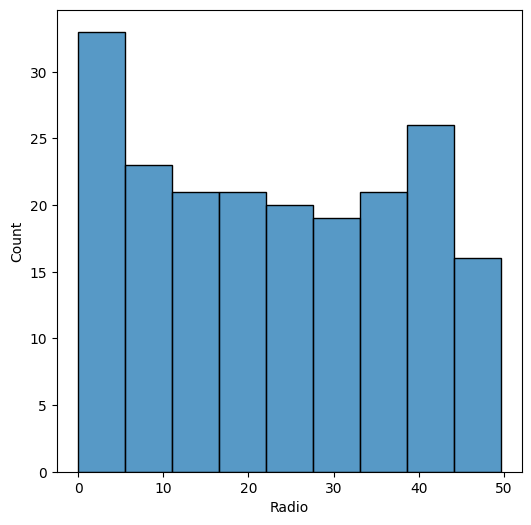

In [8]:
#item distribution on the mean
plt.figure(figsize=(6,6))
sns.histplot(advertising_data['Radio'])
plt.show()


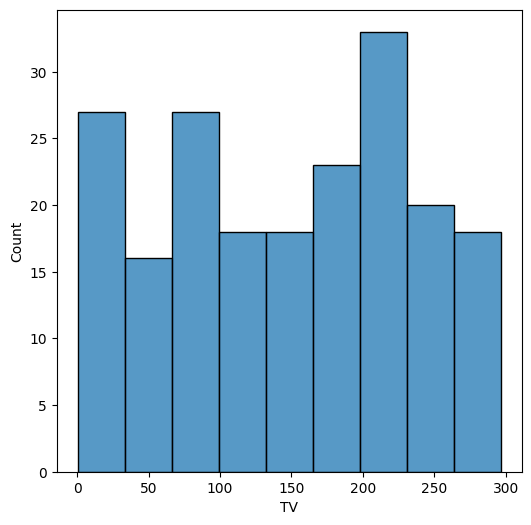

In [9]:
#for tv
plt.figure(figsize=(6,6))
sns.histplot(advertising_data['TV'])
plt.show()


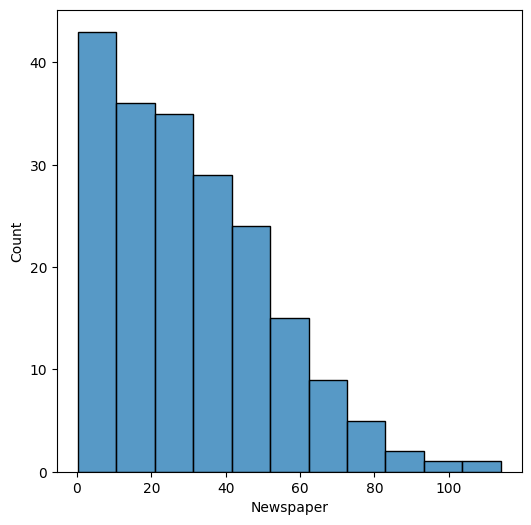

In [10]:
# for magazine
plt.figure(figsize=(6,6))
sns.histplot(advertising_data['Newspaper'])
plt.show()


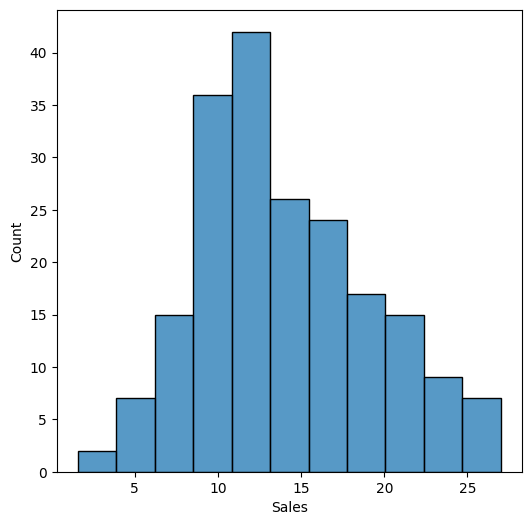

In [11]:
# for unmamed
plt.figure(figsize=(6,6))
sns.histplot(advertising_data['Sales'])
plt.show()


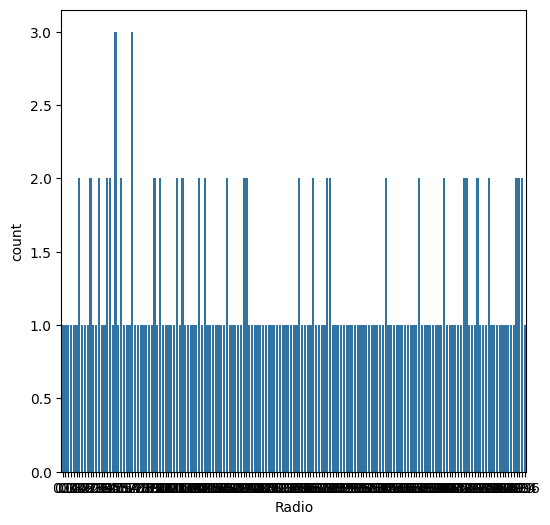

In [14]:
plt.figure(figsize=(6,6))
sns.countplot(x='Radio',data=advertising_data)
plt.show()


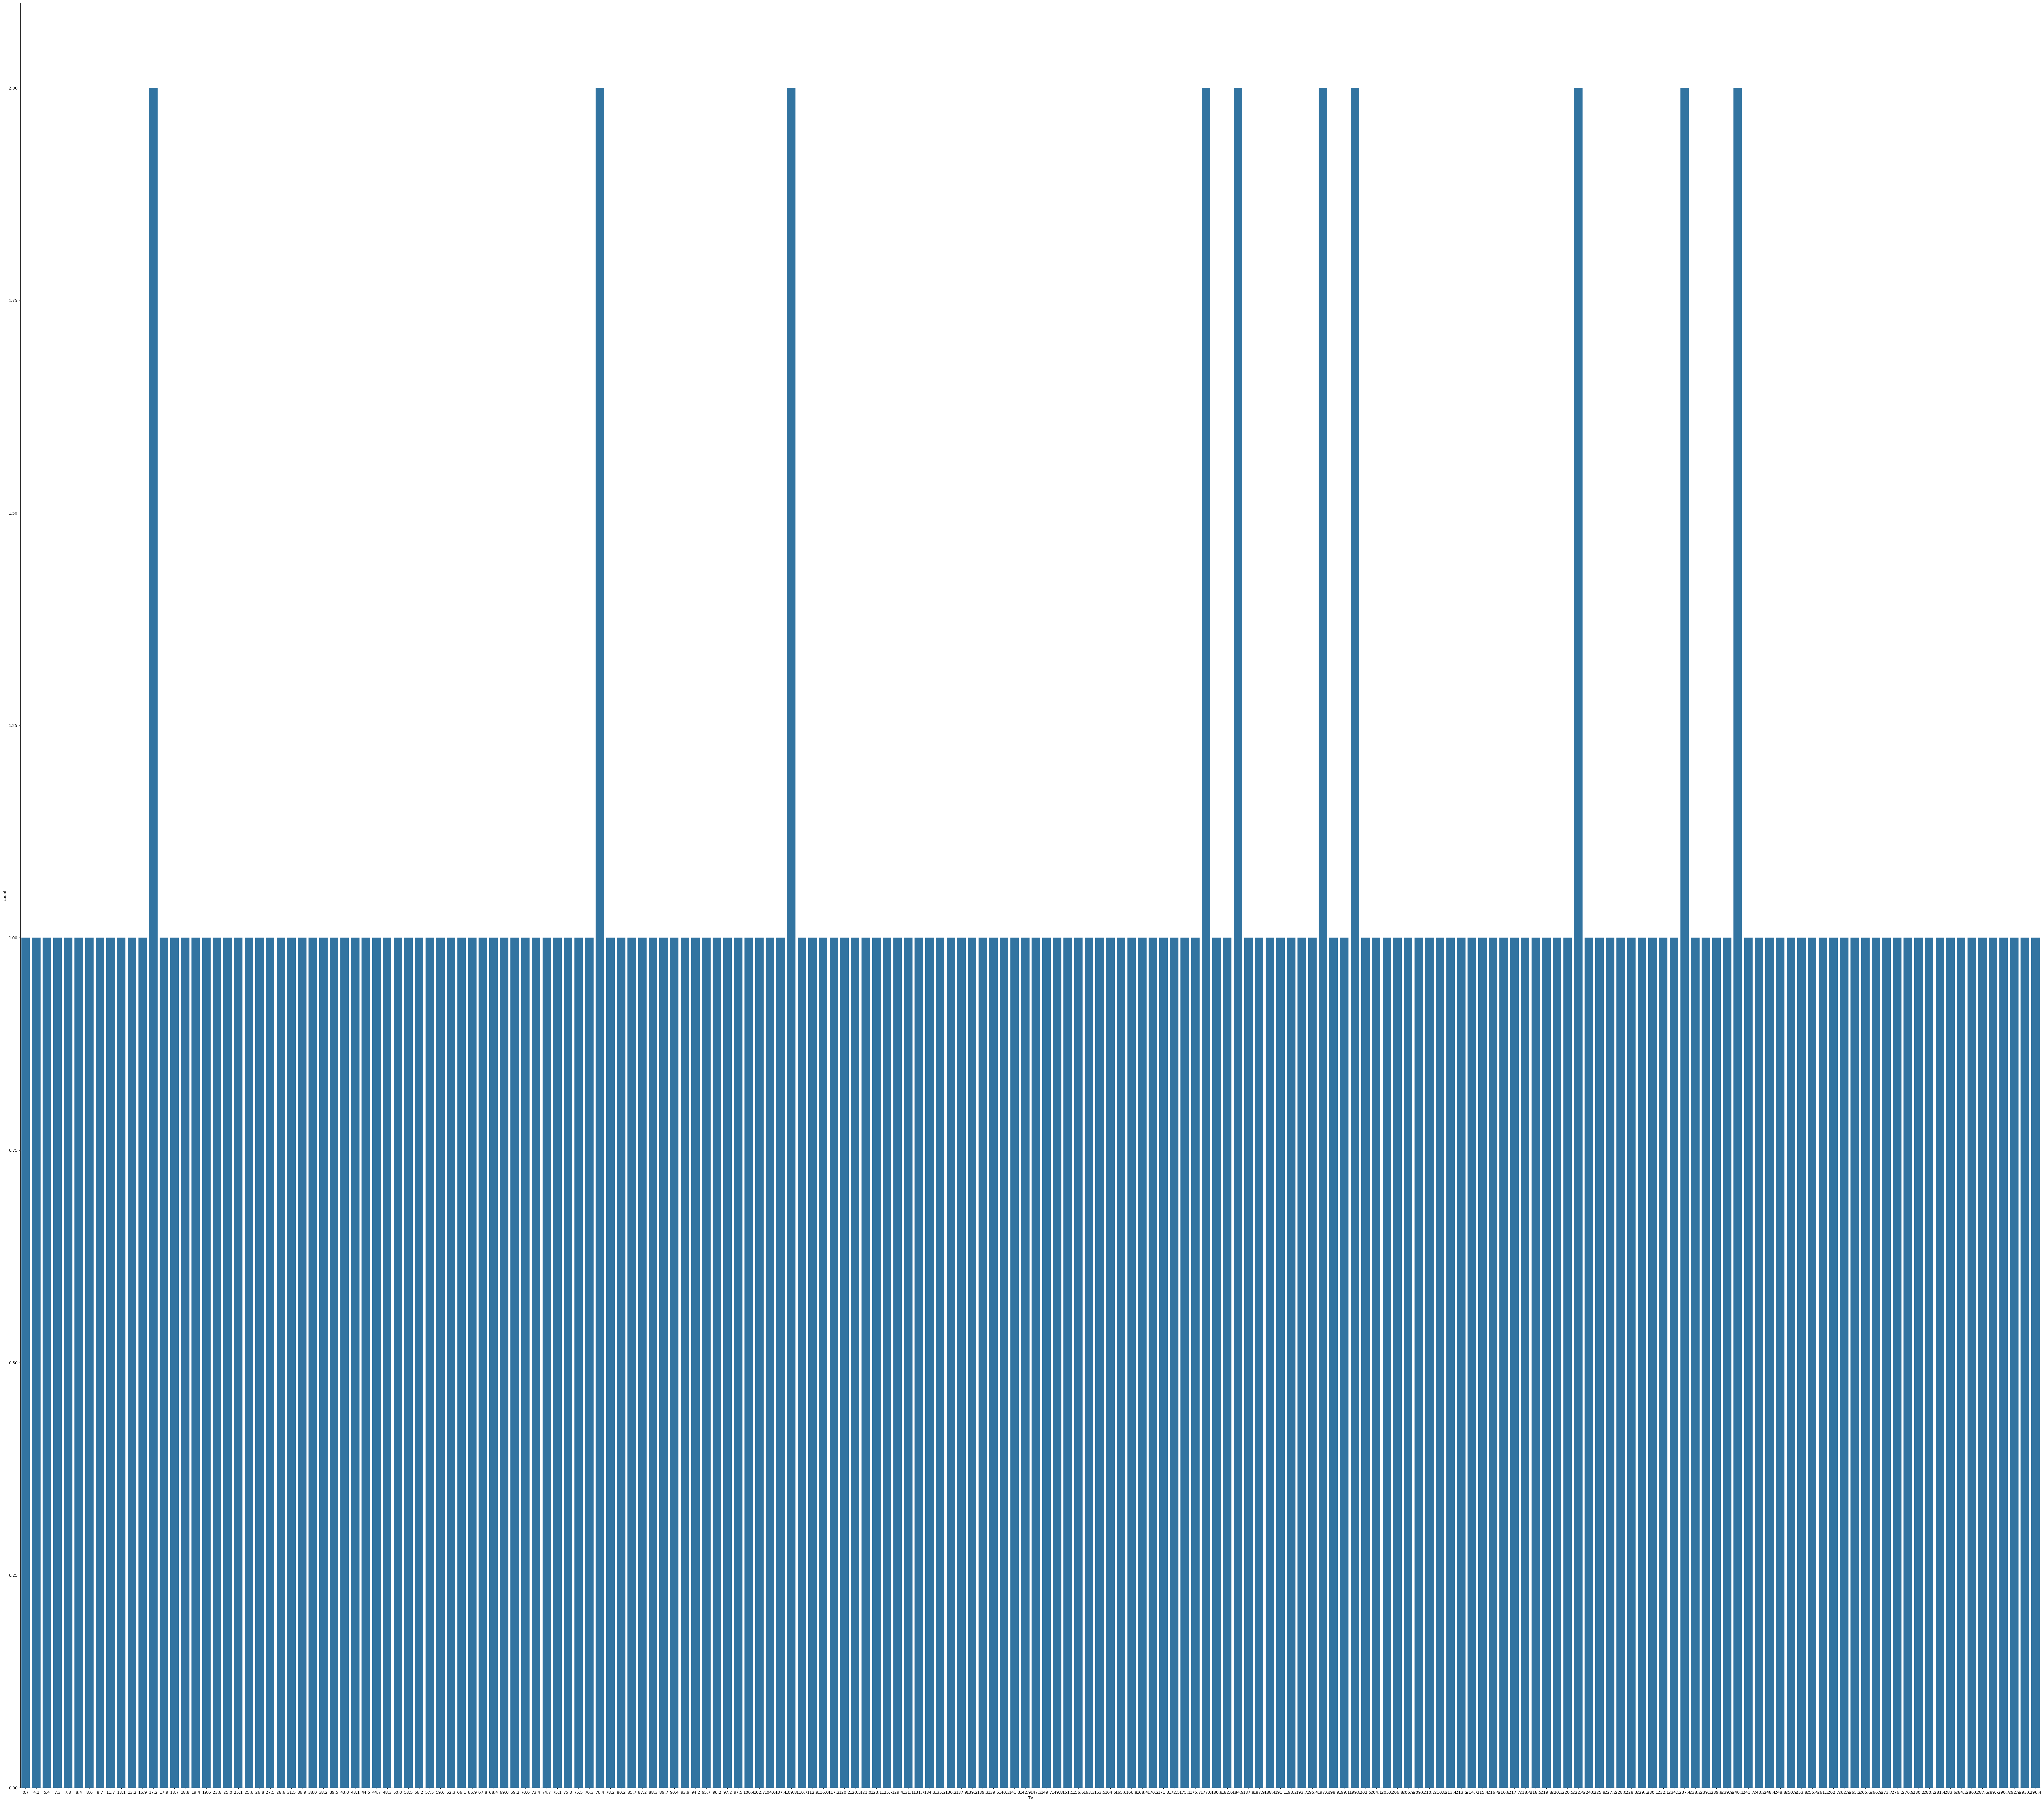

In [12]:
plt.figure(figsize=(90,80))
sns.countplot(x='TV',data=advertising_data)
plt.show()

Data Pre-Processing

In [13]:
advertising_data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [14]:
advertising_data['Sales'].value_counts()


,count
Sales,
9.7,5
11.7,4
12.9,4
15.9,4
20.7,3
...,...
17.0,1
18.3,1
22.3,1


Label Encoding


In [7]:
encoder=LabelEncoder()

In [8]:
advertising_data['Sales']=encoder.fit_transform(advertising_data['Sales'])
advertising_data['TV']=encoder.fit_transform(advertising_data['TV'])
advertising_data['Radio']=encoder.fit_transform(advertising_data['Radio'])
advertising_data['Newspaper']=encoder.fit_transform(advertising_data['Newspaper'])

In [9]:
advertising_data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,153,131,159,106
1,2,32,136,124,31
2,3,12,156,160,23
3,4,98,142,149,89
4,5,112,41,148,54


Splitting features and targets

In [10]:
x=advertising_data.drop(columns='Sales',axis=1)
y=advertising_data['Sales']

In [11]:
print(x)

     Unnamed: 0   TV  Radio  Newspaper
0             1  153    131        159
1             2   32    136        124
2             3   12    156        160
3             4   98    142        149
4             5  112     41        148
..          ...  ...    ...        ...
195         196   28     18         44
196         197   63     21         23
197         198  111     35         20
198         199  181    145        158
199         200  154     34         27

[200 rows x 4 columns]


In [22]:
print(y)

0      106
1       31
2       23
3       89
4       54
      ... 
195     14
196     27
197     53
198    118
199     57
Name: Sales, Length: 200, dtype: int64


Training and testing data

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [13]:
print(x.shape,x_train.shape,x_test.shape)

(200, 4) (160, 4) (40, 4)


Machine learning Model training

In [14]:
#XGBoost regressor
regressor=XGBRegressor()

In [15]:
regressor = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)

In [16]:
regressor.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=3, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

Evaluation

In [17]:
#predict on training data
training_data_prediction=regressor.predict(x_train)

In [18]:
#R squared value
r2_train=metrics.r2_score(y_train,training_data_prediction)

In [19]:
print('R squared value:',r2_train)

R squared value: 0.9985670447349548


In [20]:
#testing data r
test_data_prediction=regressor.predict(x_test)

In [21]:
r2_test=metrics.r2_score(y_test,test_data_prediction)

In [22]:
print('R squared value:',r2_test)

R squared value: 0.9800387620925903


In [23]:
!pip install xgboost==1.7.2

In [24]:
!pip install --upgrade scikit-learn xgboost # or skorch

  Using cached scikit_learn-1.6.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
  Using cached xgboost-2.1.3-py3-none-manylinux_2_28_x86_64.whl.metadata (2.1 kB)
Using cached scikit_learn-1.6.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.5 MB)
Using cached xgboost-2.1.3-py3-none-manylinux_2_28_x86_64.whl (153.9 MB)
  Attempting uninstall: xgboost
    Found existing installation: xgboost 1.7.2
    Uninstalling xgboost-1.7.2:
      Successfully uninstalled xgboost-1.7.2
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.2
    Uninstalling scikit-learn-1.5.2:
      Successfully uninstalled scikit-learn-1.5.2


In [1]:
!pip uninstall scikit-learn -y

Found existing installation: scikit-learn 1.5.2
Uninstalling scikit-learn-1.5.2:
  Successfully uninstalled scikit-learn-1.5.2


In [2]:
!pip install scikit-learn==1.5.2

  Using cached scikit_learn-1.5.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (13 kB)
Using cached scikit_learn-1.5.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.3 MB)
